In [2]:
import pandas as pd
df =pd.read_csv('cleaned_consumer_complaint.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

,category_id,Cleaned_consumer_complaint
0,0,dear sir madam writing complain ask assistance...
1,1,process working citi modification back sale da...
2,1,since ocwen loan services taken upon escrow ho...
3,2,erroneously billed dropped internet service ad...
4,3,not able remove credit freeze may put account ...


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Cleaned_consumer_complaint'], 
                                                    df['category_id'], 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=df['category_id'])

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(804,) (345,) (804,) (345,)


In [4]:
##################################
#COUNT VECTORIZER MACHINE LEARNING 
#################################
#RESULTS 
#################################
                           #5 fold CROSS VALIDATION ACCURACY 
#LinearSVC                 0.601696
#LogisticRegression        0.637696
#MultinomialNB             0.674154
#RandomForestClassifier    0.361392

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()



In [6]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_consumer_complaint'], df['category_id'], random_state= 0,test_size=0.2)
X_train_count = vectorizer.fit_transform(X_train)

#linear svc model
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_count, y_train)
from sklearn import metrics
y_pred = clf.predict(vectorizer.transform(X_test))
print(metrics.classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
#indiviadual prediction 
print(clf.predict(vectorizer.transform(['I have outdated information on my credit report'])))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74        22
           1       0.92      0.89      0.90        37
           2       0.71      0.85      0.77        52
           3       0.45      0.58      0.51        33
           4       0.31      0.29      0.30        14
           5       0.56      0.38      0.45        13
           6       0.41      0.42      0.42        26
           7       0.43      0.64      0.51        14
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1

    accuracy                           0.60       230
   macro avg       0.34      0.33      0.33       230
weighted avg       0.59      0.60      0.59       230

0.6
[3]


C:\Users\INE12363221\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
features = vectorizer.fit_transform(df.Cleaned_consumer_complaint).toarray()
labels = df.category_id
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV,verbose=1)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\INE12363221\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

model_name
LinearSVC                 0.632721
LogisticRegression        0.657084
MultinomialNB             0.683224
RandomForestClassifier    0.363778
Name: accuracy, dtype: float64

In [8]:
##################################
# TFIDF WORD N GRAM  MACHINE LEARNING 
#################################
#RESULTS 
#################################
                           #5 fold CROSS VALIDATION ACCURACY 
# LinearSVC                 0.745309
# LogisticRegression        0.735204
# MultinomialNB             0.614309
# RandomForestClassifier    0.355287

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english', #to remove all common pronouns to reduce the number of noisy features
                       analyzer='word')
features_word = tfidf.fit_transform(df.Cleaned_consumer_complaint).toarray()
labels = df.category_id

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_word, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC             0.696271
LogisticRegression    0.673651
MultinomialNB         0.547450
Name: accuracy, dtype: float64

In [11]:
##################################
# TFIDF CHARACTER  N GRAM  MACHINE LEARNING 
#################################
#RESULTS 
#################################
                           #5 fold CROSS VALIDATION ACCURACY 
# model_name
# LinearSVC                 0.740256
# LogisticRegression        0.733851
# MultinomialNB             0.541140
# RandomForestClassifier    0.475009

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,4), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english', #to remove all common pronouns to reduce the number of noisy features
                       analyzer='char')
features_char = tfidf.fit_transform(df.Cleaned_consumer_complaint).toarray()
labels = df.category_id

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_char, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.707587
LogisticRegression    0.658868
MultinomialNB         0.397729
Name: accuracy, dtype: float64

In [14]:
#######################################################
#HYBRID TFIDF 
#######################################################
                           #5 fold CROSS VALIDATION ACCURACY 
# model_name
# LinearSVC                 0.747023
# LogisticRegression        0.750000
# MultinomialNB             0.550703
# RandomForestClassifier    0.455702

In [116]:
#let us combine both word and char 
import numpy as np
feature_word_char =  np.hstack((features_word, features_char))
labels = df.category_id
print(feature_word_char.shape)
print(features_word.shape)
print(features_char.shape)

(1149, 15321)
(1149, 2821)
(1149, 12500)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, feature_word_char, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.700623
LogisticRegression    0.698891
MultinomialNB         0.458656
Name: accuracy, dtype: float64

In [17]:
######################################
#UNIDIRECTIONAL LSTM /GRU WITHOUT PRETRAINED MODEL
######################################


In [18]:
#TEXT PREPROCESSING FOR NURAL NETWORK 
#1. TOKENIZE THE CORPUS 
from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 50000
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df['Cleaned_consumer_complaint'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 7143 unique tokens.


In [19]:
word_index

{'not': 1,
 'credit': 2,
 'account': 3,
 'loan': 4,
 'would': 5,
 'payment': 6,
 'bank': 7,
 'debt': 8,
 'told': 9,
 'information': 10,
 'report': 11,
 'company': 12,
 'n': 13,
 'received': 14,
 'mortgage': 15,
 'card': 16,
 'called': 17,
 'never': 18,
 'pay': 19,
 'sent': 20,
 'time': 21,
 'call': 22,
 'get': 23,
 'letter': 24,
 'back': 25,
 'paid': 26,
 'payments': 27,
 'said': 28,
 'also': 29,
 'phone': 30,
 'could': 31,
 'money': 32,
 'made': 33,
 'number': 34,
 'due': 35,
 'amount': 36,
 'collection': 37,
 'home': 38,
 'one': 39,
 'since': 40,
 'days': 41,
 'reporting': 42,
 'asked': 43,
 'interest': 44,
 'even': 45,
 'file': 46,
 'still': 47,
 'date': 48,
 'years': 49,
 'late': 50,
 'balance': 51,
 'month': 52,
 'help': 53,
 'request': 54,
 'make': 55,
 'check': 56,
 'us': 57,
 'contacted': 58,
 'name': 59,
 'please': 60,
 'new': 61,
 'accounts': 62,
 'service': 63,
 'months': 64,
 'fee': 65,
 'complaint': 66,
 'day': 67,
 'first': 68,
 'another': 69,
 'times': 70,
 'dispute': 71

In [20]:
X = tokenizer.texts_to_sequences(df['Cleaned_consumer_complaint'].values)
X

[[1581,
  2739,
  2740,
  453,
  1377,
  336,
  463,
  210,
  238,
  197,
  4,
  514,
  1231,
  211,
  197,
  81,
  1582,
  1231,
  40,
  560,
  4315,
  198,
  1911,
  119,
  91,
  21,
  33,
  119,
  6,
  21,
  211,
  878,
  1041,
  372,
  63,
  4,
  1153,
  49,
  21,
  27,
  91,
  1,
  134,
  293,
  25,
  4316,
  1231,
  629,
  1090,
  3,
  2741,
  96,
  5,
  2372,
  1911,
  353,
  1583,
  729,
  2373,
  5,
  647,
  122,
  1091,
  5,
  647,
  293,
  2091,
  1231,
  72,
  402,
  49,
  98,
  1090,
  3,
  1232,
  20,
  1231,
  97,
  543,
  99,
  1090,
  668,
  1231,
  1310,
  5,
  229,
  647,
  122,
  72,
  164,
  86,
  49,
  5,
  80,
  4317,
  1759,
  433,
  1469,
  23,
  1912,
  177,
  304,
  116,
  41,
  5,
  29,
  72,
  213,
  1090,
  47,
  2374,
  1231,
  3,
  1584,
  96,
  3306,
  2372,
  1911,
  353,
  40,
  3307,
  1090,
  4318,
  25,
  3,
  38,
  1,
  83,
  10,
  480,
  2372,
  1911,
  178,
  191,
  194,
  1378,
  2092,
  948,
  238,
  293,
  2093,
  21,
  1231,
  648,
  5,
  64

In [21]:
#pad sequence 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1149, 250)


In [22]:
#Handle categorical label 
Y = pd.get_dummies(df['category_id']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1149, 14)


In [23]:
#train test split 
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1034, 250) (1034, 14)
(115, 250) (115, 14)


In [24]:
EMBEDDING_DIM=100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(14, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 128

In [25]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 250, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 14)                1414      
Total params: 5,081,814
Trainable params: 5,081,814
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
history_LSTM = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)


Train on 1034 samples, validate on 115 samples
Epoch 1/10
1034/1034 [==============================] - 10s 10ms/sample - loss: 2.6200 - accuracy: 0.2021 - val_loss: 2.5681 - val_accuracy: 0.2522
Epoch 2/10
1034/1034 [==============================] - 6s 5ms/sample - loss: 2.3875 - accuracy: 0.2524 - val_loss: 2.2492 - val_accuracy: 0.2522
Epoch 3/10
1034/1034 [==============================] - 6s 6ms/sample - loss: 2.1858 - accuracy: 0.2544 - val_loss: 2.2003 - val_accuracy: 0.2522
Epoch 4/10
1034/1034 [==============================] - 5s 5ms/sample - loss: 2.1505 - accuracy: 0.2553 - val_loss: 2.1891 - val_accuracy: 0.2522
Epoch 5/10
1034/1034 [==============================] - 5s 5ms/sample - loss: 2.1377 - accuracy: 0.2660 - val_loss: 2.1723 - val_accuracy: 0.2522
Epoch 6/10
1034/1034 [==============================] - 5s 5ms/sample - loss: 2.1031 - accuracy: 0.2814 - val_loss: 2.1541 - val_accuracy: 0.2522
Epoch 7/10
1034/1034 [==============================] - 5s 5ms/sample - los

In [27]:
# Plot results
import matplotlib.pyplot as plt

acc = history_LSTM.history['accuracy']
val_acc = history_LSTM.history['val_accuracy']
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [28]:
#TEST ACCURACY CLASSIFICATION REPORT
print("*********TEST SET CLASSIFICATION REPORT****************")
y_pred_labels =np.argmax(model.predict(X_test), axis = 1)
y_test_labels = np.argmax(y_test, axis =1)
from sklearn.metrics import classification_report
print(classification_report(y_test_labels,y_pred_labels))
#TEST ACCURACY
print("*********TEST ACCURACY****************")
score, acc = model.evaluate(X_test, y_test,batch_size=batch_size, verbose=2)
print('Test accuracy:', acc)
#TEST ACCURACY
print("*********TRAIN ACCURACY****************")
score, acc = model.evaluate(X_train, y_train,batch_size=batch_size, verbose=2)
print('Train accuracy:', acc)

*********TEST SET CLASSIFICATION REPORT****************


C:\Users\INE12363221\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.33      0.79      0.46        24
           2       0.61      0.86      0.71        29
           3       0.56      0.60      0.58        15
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2

    accuracy                           0.46       115
   macro avg       0.12      0.17      0.14       115
weighted avg       0.30      0.46      0.35       115

*********TEST ACCURACY****************
115/1 - 0s - loss: 1.7527 - accuracy: 0.

In [29]:
######################################
#BDIRECTIONAL LSTM /GRU WITHOUT PRETRAINED MODELI
######################################


In [30]:
EMBEDDING_DIM=100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM ,Bidirectional
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(14, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 128

In [31]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense_1 (Dense)              (None, 14)                2814      
Total params: 5,163,614
Trainable params: 5,163,614
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
history_LSTM = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

Train on 1034 samples, validate on 115 samples
Epoch 1/10
1034/1034 [==============================] - 18s 18ms/sample - loss: 2.5625 - accuracy: 0.2137 - val_loss: 2.3343 - val_accuracy: 0.2522
Epoch 2/10
1034/1034 [==============================] - 10s 9ms/sample - loss: 2.2574 - accuracy: 0.2515 - val_loss: 2.1919 - val_accuracy: 0.2522
Epoch 3/10
1034/1034 [==============================] - 10s 10ms/sample - loss: 2.1646 - accuracy: 0.2631 - val_loss: 2.1828 - val_accuracy: 0.2522
Epoch 4/10
1034/1034 [==============================] - 16s 16ms/sample - loss: 2.1237 - accuracy: 0.2669 - val_loss: 2.1640 - val_accuracy: 0.2522
Epoch 5/10
1034/1034 [==============================] - 10s 10ms/sample - loss: 2.0517 - accuracy: 0.2863 - val_loss: 2.1030 - val_accuracy: 0.3130
Epoch 6/10
1034/1034 [==============================] - 9s 9ms/sample - loss: 1.9099 - accuracy: 0.4323 - val_loss: 1.8865 - val_accuracy: 0.4870
Epoch 7/10
1034/1034 [==============================] - 9s 9ms/sampl

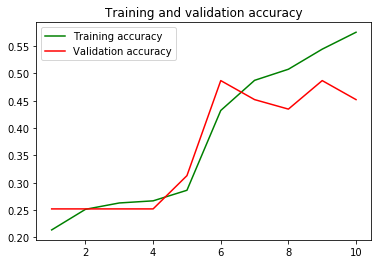

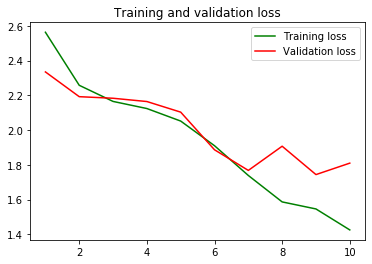

In [33]:
# Plot results
import matplotlib.pyplot as plt

acc = history_LSTM.history['accuracy']
val_acc = history_LSTM.history['val_accuracy']
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
#TEST ACCURACY CLASSIFICATION REPORT
print("*********TEST SET CLASSIFICATION REPORT****************")
y_pred_labels =np.argmax(model.predict(X_test), axis = 1)
y_test_labels = np.argmax(y_test, axis =1)
from sklearn.metrics import classification_report
print(classification_report(y_test_labels,y_pred_labels))
#TEST ACCURACY
print("*********TEST ACCURACY****************")
score, acc = model.evaluate(X_test, y_test,batch_size=batch_size, verbose=2)
print('Test accuracy:', acc)
#TEST ACCURACY
print("*********TRAIN ACCURACY****************")
score, acc = model.evaluate(X_train, y_train,batch_size=batch_size, verbose=2)
print('Train accuracy:', acc)

*********TEST SET CLASSIFICATION REPORT****************


C:\Users\INE12363221\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.68      0.71      0.69        24
           2       0.61      0.79      0.69        29
           3       0.24      0.80      0.37        15
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2

    accuracy                           0.45       115
   macro avg       0.12      0.18      0.13       115
weighted avg       0.33      0.45      0.37       115

*********TEST ACCURACY****************
115/1 - 0s - loss: 1.8096 - accuracy: 0.

In [35]:
##############################################
#WORD2VEC PRETRAINED 
##############################################

In [36]:
import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')

In [37]:
len(word_index)

7143

In [38]:
embedding_dim=300
#word_index represents number of different word 
#make a  matrix of zeros with rows = numner of words and columns =300
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
#if the word is not present in model that we have impoeted then that word vector will be replaced in
#embedding matrix otherwise it will remain 0 as we have defined 

for word, i in word_index.items():
    if word in word2vec_model: 
        embedding_vector = word2vec_model[word]
        embedding_matrix[i] = embedding_vector

In [39]:
#create embedding layer 
#Embedding layer takes input as dimension  i.e number of rows , column =300 ]
#weights wil be the weight matrix as defined above 
#we will make trainable = false as weight matrix is trained already 
embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=X.shape[1],
                            trainable=False)

In [40]:
model_word2vec = Sequential()
model_word2vec.add(embedding_layer)
model_word2vec.add(SpatialDropout1D(0.2))
model_word2vec.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model_word2vec.add(Dense(14, activation='softmax'))
model_word2vec.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 128
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense_1 (Dense)              (None, 14)                2814      
Total params: 5,163,614
Trainable params: 5,163,614
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
history_word2vec = model_word2vec.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Train on 1034 samples, validate on 115 samples
Epoch 1/10
1034/1034 [==============================] - 16s 16ms/sample - loss: 2.4036 - accuracy: 0.2302 - val_loss: 2.1708 - val_accuracy: 0.2522
Epoch 2/10
1034/1034 [==============================] - 14s 13ms/sample - loss: 2.1516 - accuracy: 0.2737 - val_loss: 2.1648 - val_accuracy: 0.2609
Epoch 3/10
1034/1034 [==============================] - 13s 13ms/sample - loss: 2.0680 - accuracy: 0.2950 - val_loss: 2.0678 - val_accuracy: 0.3826
Epoch 4/10
1034/1034 [==============================] - 14s 13ms/sample - loss: 1.9539 - accuracy: 0.3830 - val_loss: 1.9289 - val_accuracy: 0.4087
Epoch 5/10
1034/1034 [==============================] - 14s 14ms/sample - loss: 1.8486 - accuracy: 0.4062 - val_loss: 1.7817 - val_accuracy: 0.4174
Epoch 6/10
1034/1034 [==============================] - 14s 13ms/sample - loss: 1.7251 - accuracy: 0.4458 - val_loss: 1.7383 - val_accuracy: 0.4348
Epoch 7/10
1034/1034 [==============================] - 14s 14ms/

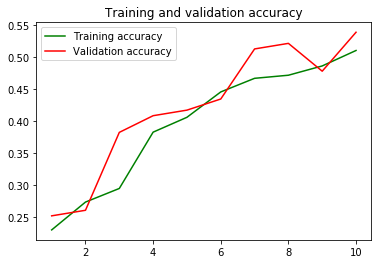

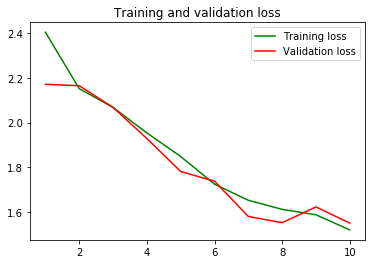

In [42]:
# Plot results
import matplotlib.pyplot as plt

acc = history_word2vec.history['accuracy']
val_acc = history_word2vec.history['val_accuracy']
loss = history_word2vec.history['loss']
val_loss = history_word2vec.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
#TEST ACCURACY CLASSIFICATION REPORT
print("*********TEST SET CLASSIFICATION REPORT****************")
y_pred_labels =np.argmax(model_word2vec.predict(X_test), axis = 1)
y_test_labels = np.argmax(y_test, axis =1)
from sklearn.metrics import classification_report
print(classification_report(y_test_labels,y_pred_labels))
#TEST ACCURACY
print("*********TEST ACCURACY****************")
score, acc = model_word2vec.evaluate(X_test, y_test,batch_size=batch_size, verbose=2)
print('Test accuracy:', acc)
#TEST ACCURACY
print("*********TRAIN ACCURACY****************")
score, acc = model_word2vec.evaluate(X_train, y_train,batch_size=batch_size, verbose=2)
print('Train accuracy:', acc)

*********TEST SET CLASSIFICATION REPORT****************


C:\Users\INE12363221\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.65      0.71      0.68        24
           2       0.64      0.97      0.77        29
           3       0.56      0.60      0.58        15
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.25      0.33      0.29         9
           7       0.29      0.62      0.40         8
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2

    accuracy                           0.54       115
   macro avg       0.18      0.25      0.21       115
weighted avg       0.41      0.54      0.46       115

*********TEST ACCURACY****************
115/1 - 0s - loss: 1.5508 - accuracy: 0.

In [97]:
#############################
#WORD2VEC CUSTOM WORD2VEC
###########################

In [98]:
print(df.head())

   category_id                         Cleaned_consumer_complaint
0            0  dear sir madam writing complain ask assistance...
1            1  process working citi modification back sale da...
2            1  since ocwen loan services taken upon escrow ho...
3            2  erroneously billed dropped internet service ad...
4            3  not able remove credit freeze may put account ...


In [99]:
print(df.shape)

(1149, 2)


In [100]:
all_complaint = list()
lines = df["Cleaned_consumer_complaint"].values.tolist()
for text in lines:
    words=text.split()
    all_complaint.append(words)
all_complaint[0:2]    

[['dear',
  'sir',
  'madam',
  'writing',
  'complain',
  'ask',
  'assistance',
  'regarding',
  'current',
  'student',
  'loan',
  'servicer',
  'mohela',
  'federal',
  'student',
  'loans',
  'serviced',
  'mohela',
  'since',
  'approimately',
  'renewed',
  'application',
  'ibr',
  'every',
  'year',
  'time',
  'made',
  'every',
  'payment',
  'time',
  'federal',
  'employee',
  'seeking',
  'public',
  'service',
  'loan',
  'forgiveness',
  'years',
  'time',
  'payments',
  'year',
  'not',
  'receive',
  'taes',
  'back',
  'accountant',
  'mohela',
  'posted',
  'link',
  'account',
  'webpage',
  'stating',
  'would',
  'renew',
  'ibr',
  'plan',
  'epired',
  'timely',
  'fashion',
  'would',
  'submit',
  'documents',
  'thinking',
  'would',
  'submit',
  'taes',
  'upload',
  'mohela',
  'like',
  'previous',
  'years',
  'went',
  'link',
  'account',
  'broken',
  'sent',
  'mohela',
  'email',
  'waiting',
  'see',
  'link',
  'fied',
  'mohela',
  'replied',


In [101]:
#TEXT PREPROCESSING FOR NURAL NETWORK 
#1. TOKENIZE THE CORPUS 
from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 50000
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df['Cleaned_consumer_complaint'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 7143 unique tokens.


In [102]:
X = tokenizer.texts_to_sequences(df['Cleaned_consumer_complaint'].values)

#pad sequence 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)


#Handle categorical label 
Y = pd.get_dummies(df['category_id']).values
print('Shape of label tensor:', Y.shape)


#train test split 
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

Shape of data tensor: (1149, 250)
Shape of label tensor: (1149, 14)
(1034, 250) (1034, 14)
(115, 250) (115, 14)


In [103]:
#all_complaint = df["Cleaned_consumer_complaint"].values.tolist()
import gensim
model = gensim.models.Word2Vec(sentences=all_complaint, size=100, window=5, workers=4, min_count=1, sg=0) #sg= 1:skip-gram 0:cbow
vocab_words = list(model.wv.vocab)                                                                      
print(len(vocab_words))


7143


In [104]:
#hyper meter  
# size: The number of dimensions of the embeddings and the default is 100.
# window: The maximum distance between a target word and words around the target word. The default window is 5.
# min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
# workers: The number of partitions during training and the default workers is 3.
# sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [105]:
#save wordvectors
filename = "complaint_classifier_word2vec.txt"
model.wv.save_word2vec_format(filename, binary=False)

In [106]:
#read and create embedding matrix
import os 
import numpy as np
embedding_index = {}
f = open(os.path.join('', 'complaint_classifier_word2vec.txt'),  encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coeff = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coeff
f.close()
embedding_index

{'7143': array([100.], dtype=float32),
 'not': array([-0.28233197,  0.28419748, -0.16940223, -0.3616576 , -0.9166479 ,
         0.8737573 , -0.41626808,  0.6624933 ,  0.6334218 ,  0.12888277,
         0.74150205,  0.64334756,  1.6862302 , -0.2743694 , -0.31352523,
         1.0325948 , -0.2234054 , -0.19470584,  0.261741  , -0.22321485,
        -0.76967573,  0.5613477 , -0.3649552 ,  0.39293298, -0.0701851 ,
        -0.7681268 ,  0.20260814,  0.37621704, -0.8701963 ,  0.49257064,
         0.38800764,  1.0166659 , -0.7448352 , -0.41364118, -0.5114411 ,
        -0.20626946, -0.09073881,  0.60954297, -0.26818994,  0.9794818 ,
        -0.28595462,  0.3087754 , -0.2534858 ,  0.26360255,  0.26441184,
        -0.14854945, -0.425308  , -0.24905214, -0.9333396 ,  0.05241499,
        -0.2189305 ,  0.47259447, -0.54126   , -0.96835613, -0.78669655,
         0.45209834, -0.32293612,  0.6432243 , -0.6309963 , -0.57888883,
        -0.37702867, -0.55252904, -1.2536584 ,  0.79264337, -0.08284698,
     

In [107]:
embedding_dim=100
#make a  matrix of zeros with rows = numner of words and columns =300
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
#if the word is not present in model that we have impoeted then that word vector will be replaced in
#embedding matrix otherwise it will remain 0 as we have defined 
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [108]:
#create embedding layer 
#Embedding layer takes input as dimension  i.e number of rows , column =300 ]
#weights wil be the weight matrix as defined above 
#we will make trainable = false as weight matrix is trained already 
embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=X.shape[1],
                            trainable=True)

In [109]:
EMBEDDING_DIM=100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM ,Bidirectional
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D

model_word2_vec_custom = Sequential()
model_word2_vec_custom.add(embedding_layer)
model_word2_vec_custom.add(SpatialDropout1D(0.2))
model_word2_vec_custom.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model_word2_vec_custom.add(Dense(14, activation='softmax'))
model_word2_vec_custom.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 128
print(model_word2_vec_custom.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 250, 100)          714400    
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 250, 100)          0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_6 (Dense)              (None, 14)                2814      
Total params: 878,014
Trainable params: 878,014
Non-trainable params: 0
_________________________________________________________________
None


In [110]:
history_word2vec = model_word2_vec_custom.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Train on 1034 samples, validate on 115 samples
Epoch 1/10
1034/1034 [==============================] - 25s 24ms/sample - loss: 2.3286 - accuracy: 0.2350 - val_loss: 2.1890 - val_accuracy: 0.2783
Epoch 2/10
1034/1034 [==============================] - 21s 20ms/sample - loss: 2.1737 - accuracy: 0.2611 - val_loss: 2.2012 - val_accuracy: 0.2870
Epoch 3/10
1034/1034 [==============================] - 20s 20ms/sample - loss: 2.1549 - accuracy: 0.2669 - val_loss: 2.1841 - val_accuracy: 0.2870
Epoch 4/10
1034/1034 [==============================] - 17s 16ms/sample - loss: 2.1520 - accuracy: 0.2611 - val_loss: 2.1796 - val_accuracy: 0.2870
Epoch 5/10
1034/1034 [==============================] - 17s 17ms/sample - loss: 2.1284 - accuracy: 0.2708 - val_loss: 2.1783 - val_accuracy: 0.2609
Epoch 6/10
1034/1034 [==============================] - 16s 16ms/sample - loss: 2.1134 - accuracy: 0.2727 - val_loss: 2.1757 - val_accuracy: 0.3043
Epoch 7/10
1034/1034 [==============================] - 16s 16ms/

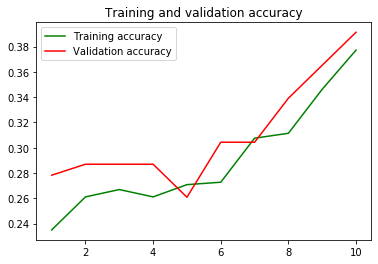

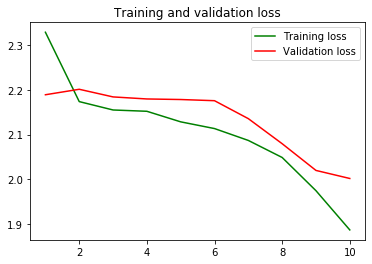

In [111]:
# Plot results
import matplotlib.pyplot as plt

acc = history_word2vec.history['accuracy']
val_acc = history_word2vec.history['val_accuracy']
loss = history_word2vec.history['loss']
val_loss = history_word2vec.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [112]:
#TEST ACCURACY CLASSIFICATION REPORT
print("*********TEST SET CLASSIFICATION REPORT****************")
y_pred_labels =np.argmax(model_word2_vec_custom.predict(X_test), axis = 1)
y_test_labels = np.argmax(y_test, axis =1)
from sklearn.metrics import classification_report
print(classification_report(y_test_labels,y_pred_labels))
#TEST ACCURACY
print("*********TEST ACCURACY****************")
score, acc = model_word2_vec_custom.evaluate(X_test, y_test,batch_size=batch_size, verbose=2)
print('Test accuracy:', acc)
#TEST ACCURACY
print("*********TRAIN ACCURACY****************")
score, acc = model_word2_vec_custom.evaluate(X_train, y_train,batch_size=batch_size, verbose=2)
print('Train accuracy:', acc)

*********TEST SET CLASSIFICATION REPORT****************


C:\Users\INE12363221\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.44      0.67      0.53        24
           2       0.37      1.00      0.54        29
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2

    accuracy                           0.39       115
   macro avg       0.06      0.13      0.08       115
weighted avg       0.19      0.39      0.25       115

*********TEST ACCURACY****************
115/1 - 0s - loss: 2.0020 - accuracy: 0.